In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

2024-05-26 17:39:57.287486: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-26 17:39:57.287668: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-26 17:39:57.433641: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
train_dir= '/kaggle/input/chest-xray-pneumonia/chest_xray/train'
training_generator = ImageDataGenerator(rescale=1/255)
data_train = training_generator.flow_from_directory(train_dir, target_size=(256,256))

Found 5216 images belonging to 2 classes.


In [4]:
valid_dir= "/kaggle/input/chest-xray-pneumonia/chest_xray/val"
valid_generator = ImageDataGenerator(rescale=1/255)
valid_train = training_generator.flow_from_directory(valid_dir, target_size=(256,256))

Found 16 images belonging to 2 classes.


In [5]:
test_dir= "/kaggle/input/chest-xray-pneumonia/chest_xray/test"
test_generator = ImageDataGenerator(rescale=1/255)
test_train = training_generator.flow_from_directory(test_dir , target_size=(256,256))

Found 624 images belonging to 2 classes.


In [6]:
input_shape = (256, 256, 3) 

model = Sequential()
    
    # First Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Second Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Third Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Flattening the layers
model.add(Flatten())
    
    # Fully Connected Layer
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
    
    # Output Layer
model.add(Dense(units=2, activation='sigmoid'))  # Sigmoid activation for binary classification
    
    # Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [7]:
model.summary() 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,839,234 (56.61 MB)

 Trainable params: 14,839,234 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Assuming X_train, y_train, X_val, and y_val are predefined
history = model.fit(data_train, validation_data= valid_train, epochs=6, batch_size=32)


Epoch 1/6


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 368s 2s/step - accuracy: 0.7773 - loss: 0.5154 - val_accuracy: 0.6250 - val_loss: 0.9195
Epoch 2/6
163/163 ━━━━━━━━━━━━━━━━━━━━ 362s 2s/step - accuracy: 0.9453 - loss: 0.1615 - val_accuracy: 0.8750 - val_loss: 0.2463
Epoch 3/6
163/163 ━━━━━━━━━━━━━━━━━━━━ 362s 2s/step - accuracy: 0.9602 - loss: 0.1147 - val_accuracy: 0.9375 - val_loss: 0.2041
Epoch 4/6
163/163 ━━━━━━━━━━━━━━━━━━━━ 360s 2s/step - accuracy: 0.9641 - loss: 0.1061 - val_accuracy: 0.8750 - val_loss: 0.2167
Epoch 5/6
163/163 ━━━━━━━━━━━━━━━━━━━━ 361s 2s/step - accuracy: 0.9732 - loss: 0.0726 - val_accuracy: 0.8125 - val_loss: 0.5407
Epoch 6/6
163/163 ━━━━━━━━━━━━━━━━━━━━ 360s 2s/step - accuracy: 0.9755 - loss: 0.0659 - val_accuracy: 0.8750 - val_loss: 0.3077


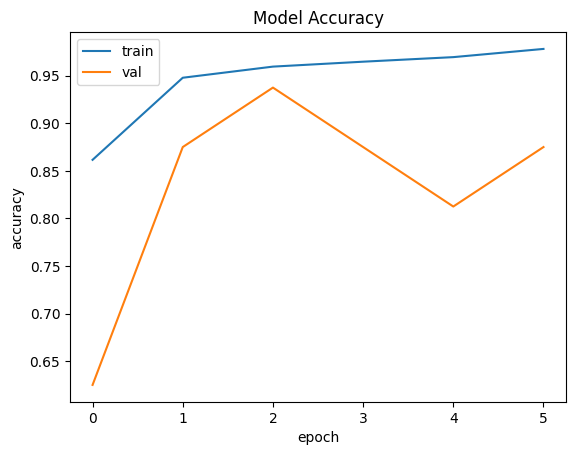

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy'),
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()